In [5]:
N = ord("A") % 3 + 1
print(N)


3


In [1]:
import csv
import numpy as np

def get_column_as_array(file_name, column_name):
    with open(file_name, mode='r', encoding='utf-8') as file:
        reader = csv.reader(file)
        header = next(reader)
        column_index = header.index(column_name)
        data = [int(row[column_index]) for row in reader if row[column_index].isdigit()]
    return np.array(data)



In [2]:
file_name = 'russia_losses_equipment.csv'
column_name = 'APC'
apc_losses = get_column_as_array(file_name, column_name)
print(apc_losses)


[17222 17170 17132 17093 17080 17077 17071 17063 17043 17003 16955 16938
 16925 16906 16897 16878 16878 16869 16848 16821 16786 16760 16736 16722
 16699 16681 16667 16648 16631 16620 16599 16567 16542 16521 16495 16480
 16473 16461 16426 16402 16385 16368 16363 16350 16341 16332 16323 16294
 16286 16255 16238 16211 16203 16161 16141 16103 16095 16074 16050 16039
 16013 16000 15980 15963 15917 15902 15883 15871 15862 15826 15811 15779
 15755 15732 15715 15704 15685 15645 15629 15611 15600 15583 15566 15550
 15524 15505 15480 15459 15450 15431 15413 15398 15383 15372 15337 15319
 15307 15287 15269 15263 15234 15208 15187 15176 15144 15131 15105 15096
 15076 15036 15020 15002 14980 14947 14935 14913 14891 14858 14818 14803
 14786 14775 14748 14721 14699 14665 14630 14595 14552 14538 14508 14460
 14417 14375 14353 14313 14281 14246 14227 14213 14179 14156 14129 14096
 14067 14046 14007 13991 13971 13957 13942 13928 13916 13904 13896 13873
 13852 13835 13827 13809 13796 13765 13745 13698 13

In [13]:
daily_apc_losses = np.diff(apc_losses)
abs_losses = np.abs(daily_apc_losses)

print(abs_losses)

[ 52  38  39  13   3   6   8  20  40  48  17  13  19   9  19   0   9  21
  27  35  26  24  14  23  18  14  19  17  11  21  32  25  21  26  15   7
  12  35  24  17  17   5  13   9   9   9  29   8  31  17  27   8  42  20
  38   8  21  24  11  26  13  20  17  46  15  19  12   9  36  15  32  24
  23  17  11  19  40  16  18  11  17  17  16  26  19  25  21   9  19  18
  15  15  11  35  18  12  20  18   6  29  26  21  11  32  13  26   9  20
  40  16  18  22  33  12  22  22  33  40  15  17  11  27  27  22  34  35
  35  43  14  30  48  43  42  22  40  32  35  19  14  34  23  27  33  29
  21  39  16  20  14  15  14  12  12   8  23  21  17   8  18  13  31  20
  47  19  12  47  45  24  54  38  73  18  18  29  17  20  20  27  21   9
  24  25  28  19  37  16   9  35  17  24  24  11  17  20  27  24  27  25
  19  51  40  28  21  28  29  30  44  14  16  37  16  15  37  35  70  36
  34  53  16  39  47  39  27  21  14  21  22  20  22  35   4  13  13  19
  16  32  29  25  19  15  16  42  31  59  23  11  1

In [14]:


top_5_indices = np.argsort(abs_losses)[-5:]

top_5_losses = abs_losses[top_5_indices]
print(top_5_losses)



[ 91  96 110 120 190]


In [5]:
import csv
from datetime import datetime

def get_summer_losses(file_name):
    start_summer_date = datetime(2023, 6, 1)
    end_summer_date = datetime(2023, 8, 31)
    
    start_summer_losses = None
    end_summer_losses = None

    with open(file_name, mode='r', encoding='utf-8') as file:
        reader = csv.reader(file)
        header = next(reader)
        
        date_index = header.index('date')
        apc_index = header.index('APC')

        for row in reader:
            date_str = row[date_index]
            total_apc_loss = row[apc_index]
            
            date = datetime.strptime(date_str, '%Y-%m-%d')
            
            if date == start_summer_date and start_summer_losses is None:
                if total_apc_loss.isdigit():
                    start_summer_losses = int(total_apc_loss)
            
            if date == end_summer_date:
                if total_apc_loss.isdigit():
                    end_summer_losses = int(total_apc_loss)

    if start_summer_losses is not None and end_summer_losses is not None:
        return end_summer_losses - start_summer_losses
    else:
        return None

file_name = 'russia_losses_equipment.csv'
summer_apc_losses = get_summer_losses(file_name)

if summer_apc_losses is not None:
    print(f"Кількість знищених БТР влітку 2023 року: {summer_apc_losses}")
else:
    print("Дані про втрати БТР за літо 2023 року не знайдені.")


Кількість знищених БТР влітку 2023 року: 1126


In [15]:
average_apc_losses = np.mean(abs_losses[100:501])
print(average_apc_losses)


19.84788029925187


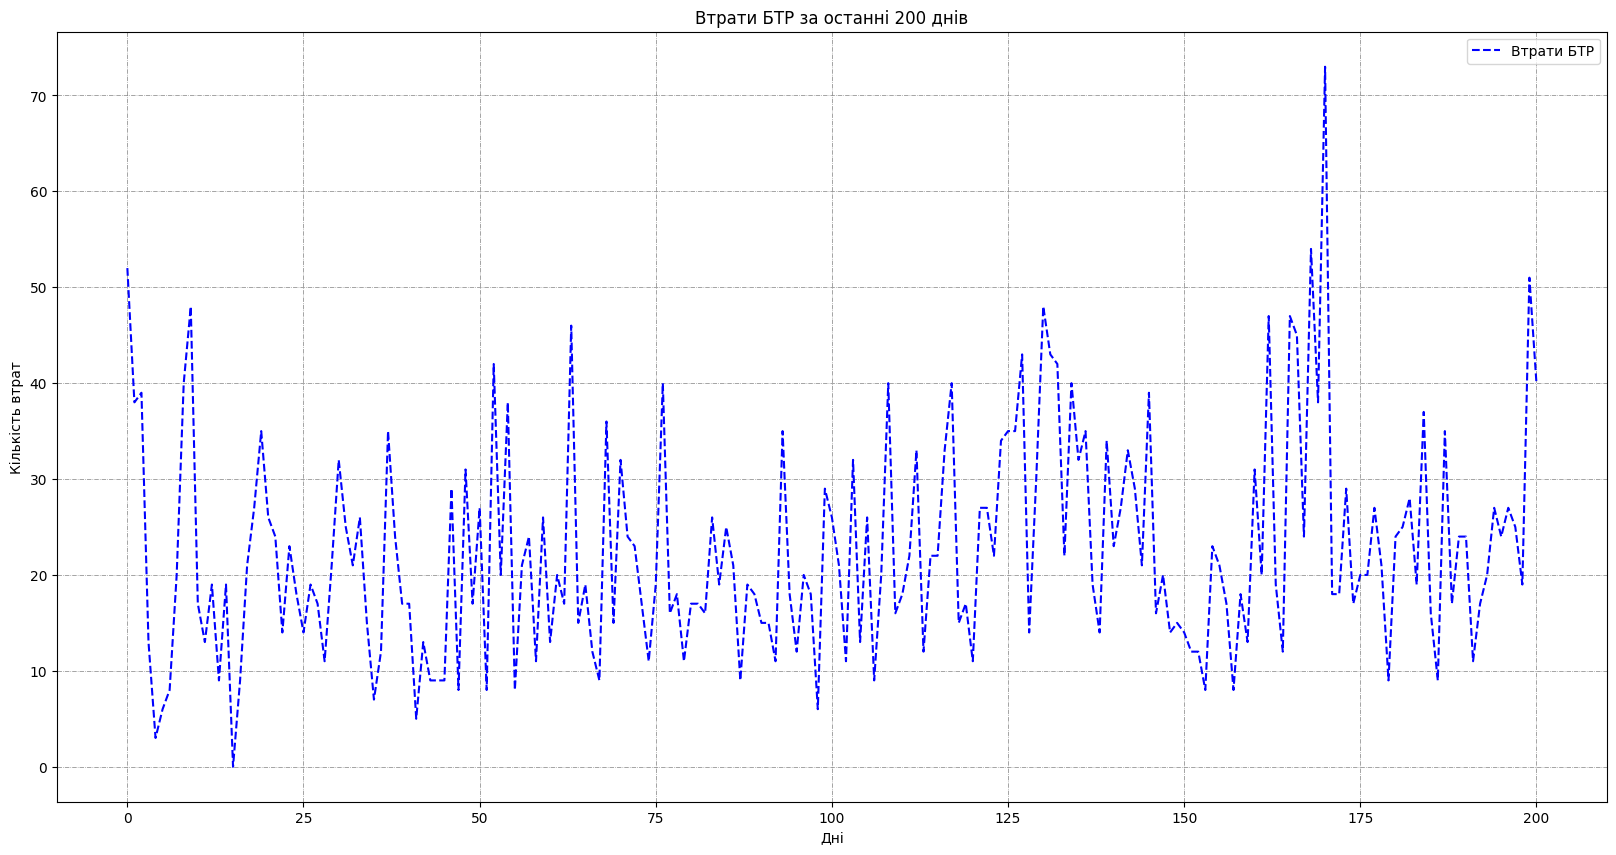

In [19]:
import matplotlib.pyplot as plt

last_200_days_losses = abs_losses[:201]

plt.figure(figsize=(20, 10), dpi=100)
plt.plot(last_200_days_losses, linestyle='--', color='b', label='Втрати БТР')

plt.grid(True, which='both', linestyle='-.', linewidth=0.5, color='gray')

plt.title('Втрати БТР за останні 200 днів')
plt.xlabel('Дні')
plt.ylabel('Кількість втрат')

plt.legend()

plt.savefig('apc_losses_last_200_days.png')

plt.show()


In [22]:
average_apc_losses = np.mean(abs_losses[-365:])
print(average_apc_losses)

16.76986301369863
